AMSTAT 313: EXAMPLE RESEARCH PROBLEM


## **Modeling Determinants of Basic Daily Pay in Western Visayas Using Machine Learning with PSA Microdata**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving FIES-LFS PUF 2023 Household Members.CSV to FIES-LFS PUF 2023 Household Members (4).CSV


In [140]:
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded file
df = pd.read_csv('FIES-LFS PUF 2023 Household Members.CSV')

# Display first few rows
df.head()

/tmp/ipython-input-597335459.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FIES-LFS PUF 2023 Household Members.CSV')


,W_REGN,W_PROV,SEQ_NO,LC101_LNO,LC03_REL,LC04_SEX,LC05_AGE,LC05A_5OVER,LC05B_ETHNICITY,LC06_MSTAT,...,LC35_LTLOOKW,LC36_AVAIL,LC37_WILLING,LC38_PREVJOB,LC39_YEAR,LC39_MONTH,LC41_POCC,LC43_QKB,NEWEMPSTAT,PWGTPRV
0,1,28,1,1,1,1,63,,109,2,...,,,,1,2023,11,8322,8411,3,80.3597
1,1,28,1,2,2,2,61,,109,2,...,,,,2,,,,,3,74.3786
2,1,28,1,3,3,2,40,,109,1,...,,,,,,,,,1,89.5315
3,1,28,2,1,1,1,31,,109,2,...,,,,,,,,,1,84.5658
4,1,28,2,2,2,2,38,,109,2,...,,,,,,,,,1,89.5315


In [141]:
# Check number of rows in the DataFrame
len(df)

684718

In [142]:
# Get unique values in W_REGN column (regions)
df["W_REGN"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 19, 16, 17])

In [143]:
# Filter rows for Western Visayas (W_REGN == 6)
df = df[df["W_REGN"] == 6]

In [144]:
# Check number of rows in the DataFrame
len(df)

43911

In [145]:
# Select relevant features
# Primary predictor: education level (HGC_LEVEL or Highest Grade Completed - Level)

df_model = df[[
    "LC07_HGC_LEVEL",       # Education level
    "LC25_PBASIC",          # Basic daily pay (Target variable)
    "LC04_SEX",             # Sex
    "LC05_AGE",             # Age
    "LC09_GRADTECH",        # Graduate of technical/vocational course - yes or no
    "LC11A_ARRANGEMENT",    # Working Arrangement - work from home, at default place, on job rotation, etc.
    "LC17_NATEM",           # Nature of employment - permanent, short-term, etc.
    "LC23_PCLASS"           # Class of Worker (Primary Occupation) - self-employed, government, private, etc.
]]

In [146]:
# Display the DataFrame

df_model

,LC07_HGC_LEVEL,LC25_PBASIC,LC04_SEX,LC05_AGE,LC09_GRADTECH,LC11A_ARRANGEMENT,LC17_NATEM,LC23_PCLASS
178949,2,,1,41,2,1,1,1
178950,2,,2,39,2,,,
178951,3,,2,18,2,,,
178952,2,,1,14,,,,
178953,0,,2,5,,,,
...,...,...,...,...,...,...,...,...
222855,2,,2,33,2,1,2,3
222856,1,,1,9,,,,
222857,,,2,1,,,,
222858,1,,2,13,,,,


# **EXPLORATORY DATA ANALYSIS**


## **Data Cleaning**

In [147]:
# REPLACE EMPTY SPACES WITH NaN

import numpy as np
import pandas as pd

# Loop this through all columns
for col in df_model.columns:
  # Convert to string and strip whitespace
  df_model[col] = df_model[col].astype(str).str.strip()
  df_model = df_model.replace(
    ['nan', 'NaN', 'NAN', 'None', 'NULL', 'null', '?', ''],
    np.nan
)

  # Replace empty spaces with NaN:
  df_model[col] = df_model[col].replace('', np.nan)

  # Replace whitespace-only strings with NaN
  df_model[col] = df_model[col].replace(r'^\s*$', np.nan, regex=True)

/tmp/ipython-input-449170507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = df_model[col].astype(str).str.strip()


In [148]:
# Display first few rows
df_model.head()

,LC07_HGC_LEVEL,LC25_PBASIC,LC04_SEX,LC05_AGE,LC09_GRADTECH,LC11A_ARRANGEMENT,LC17_NATEM,LC23_PCLASS
178949,2,NaN,1,41,2,1,1,1
178950,2,NaN,2,39,2,NaN,NaN,NaN
178951,3,NaN,2,18,2,NaN,NaN,NaN
178952,2,NaN,1,14,NaN,NaN,NaN,NaN
178953,0,NaN,2,5,NaN,NaN,NaN,NaN


In [149]:
# Filter to employed with valid pay (LC25_PBASIC is not NaN)

df_model = df_model[df_model["LC25_PBASIC"].notna()]

# Check size of DataFrame
df_model.shape

(10043, 8)

In [150]:
df_model.head()

,LC07_HGC_LEVEL,LC25_PBASIC,LC04_SEX,LC05_AGE,LC09_GRADTECH,LC11A_ARRANGEMENT,LC17_NATEM,LC23_PCLASS
178963,2,00400,1,54,2,1,2,1
178964,6,00300,2,50,2,1,1,1
178965,2,00300,1,24,2,1,2,1
178969,2,00400,1,61,2,1,2,1
178971,6,00350,2,44,2,1,1,1


In [151]:
# Check number of missing values per column
df_model.isna().sum()

,0
LC07_HGC_LEVEL,0
LC25_PBASIC,0
LC04_SEX,0
LC05_AGE,0
LC09_GRADTECH,0
LC11A_ARRANGEMENT,10
LC17_NATEM,0
LC23_PCLASS,0


In [152]:
# Drop rows with missing values in LC_11A_Arrangement column

df_model = df_model[df_model["LC11A_ARRANGEMENT"].notna()]

In [153]:
# Check size of DataFrame
df_model.shape

(10033, 8)

In [154]:
# Check for Missing Values again

df_model.isna().sum()

,0
LC07_HGC_LEVEL,0
LC25_PBASIC,0
LC04_SEX,0
LC05_AGE,0
LC09_GRADTECH,0
LC11A_ARRANGEMENT,0
LC17_NATEM,0
LC23_PCLASS,0


In [155]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10033 entries, 178963 to 222859
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LC07_HGC_LEVEL     10033 non-null  object
 1   LC25_PBASIC        10033 non-null  object
 2   LC04_SEX           10033 non-null  object
 3   LC05_AGE           10033 non-null  object
 4   LC09_GRADTECH      10033 non-null  object
 5   LC11A_ARRANGEMENT  10033 non-null  object
 6   LC17_NATEM         10033 non-null  object
 7   LC23_PCLASS        10033 non-null  object
dtypes: object(8)
memory usage: 705.4+ KB


In [156]:
# Get unique values for each column

for col in df_model.columns:
  print(f"Unique values in {col}:")
  print(df_model[col].unique())
  print()

Unique values in LC07_HGC_LEVEL:
['2' '6' '1' '3' '4' '5' '0' '7' '8']

Unique values in LC25_PBASIC:
['00400' '00300' '00350' '00450' '00173' '00192' '00550' '00500' '00600'
 '00167' '00204' '00549' '00250' '00950' '00200' '00060' '00083' '00480'
 '00166' '01318' '00420' '01204' '00483' '00674' '00551' '00125' '00727'
 '00146' '00490' '00900' '00100' '00700' '01200' '00225' '00430' '00318'
 '00307' '00780' '00460' '00770' '00885' '00150' '01455' '01136' '00491'
 '00386' '00575' '01500' '01556' '01423' '00846' '00120' '01000' '00153'
 '00620' '00375' '00211' '01300' '00135' '01400' '00692' '00410' '00800'
 '00786' '00425' '00230' '00570' '00269' '00810' '00409' '00154' '00368'
 '02090' '02318' '01227' '00215' '00750' '00455' '00390' '02500' '00416'
 '00220' '01100' '00909' '00630' '00461' '03500' '00086' '00134' '00576'
 '01228' '00863' '00227' '00109' '00115' '00340' '00382' '00175' '00193'
 '00385' '00530' '00239' '01240' '00370' '00292' '00090' '00905' '00267'
 '00495' '02909' '0151

### **EXPLORE LC25_PBASIC Column**

In [157]:
# Get the Minimum and Maximum Basic Pay

# Make sure the column is numeric
df_model["LC25_PBASIC"] = pd.to_numeric(df_model["LC25_PBASIC"], errors="coerce")

# Check min and max values
min_pay = df_model["LC25_PBASIC"].min()
max_pay = df_model["LC25_PBASIC"].max()

print("Minimum Basic Pay:", min_pay)
print("Maximum Basic Pay:", max_pay)

Minimum Basic Pay: 50
Maximum Basic Pay: 8500


In [159]:
# Make sure LC25_PBASIC is numeric
df_model["LC25_PBASIC"] = pd.to_numeric(df_model["LC25_PBASIC"], errors="coerce")

# Summary statistics
print(df_model["LC25_PBASIC"].describe())

count    10033.000000
mean       536.590352
std        404.864454
min         50.000000
25%        335.000000
50%        450.000000
75%        570.000000
max       8500.000000
Name: LC25_PBASIC, dtype: float64


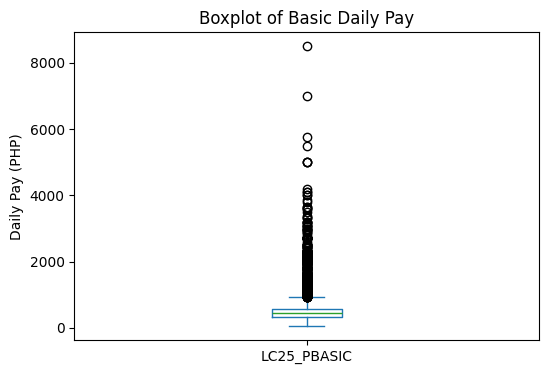

In [160]:
# Visualize Outliers using Boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_model["LC25_PBASIC"].plot(kind='box')
plt.title("Boxplot of Basic Daily Pay")
plt.ylabel("Daily Pay (PHP)")
plt.show()

In [161]:
# Identify Outliers using IQR

Q1 = df_model["LC25_PBASIC"].quantile(0.25)
Q3 = df_model["LC25_PBASIC"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -17.5
Upper bound: 922.5


In [162]:
# Count the number of outliers

outliers = df_model[(df_model["LC25_PBASIC"] < lower_bound) | (df_model["LC25_PBASIC"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 1115


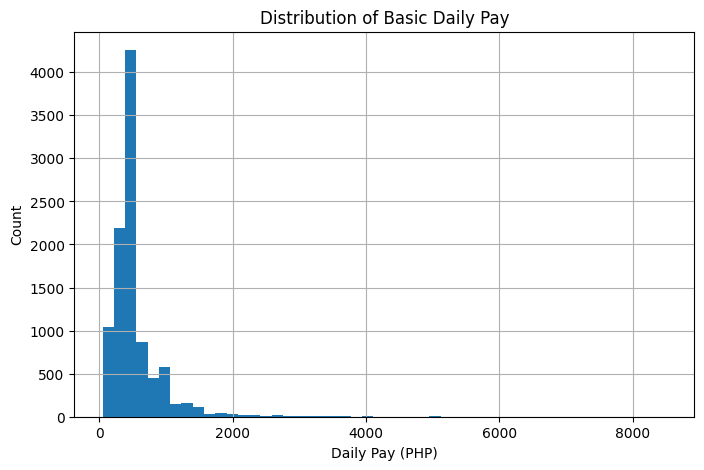

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_model["LC25_PBASIC"].hist(bins=50)
plt.title("Distribution of Basic Daily Pay")
plt.xlabel("Daily Pay (PHP)")
plt.ylabel("Count")
plt.show()

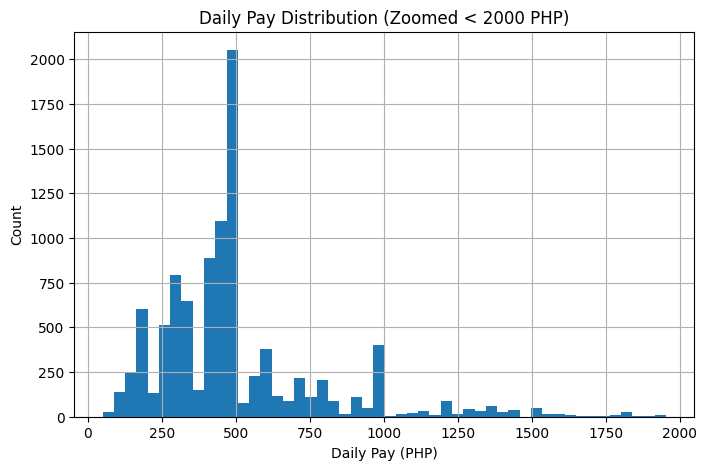

In [164]:
df_model[df_model["LC25_PBASIC"] < 2000]["LC25_PBASIC"].hist(bins=50, figsize=(8,5))
plt.title("Daily Pay Distribution (Zoomed < 2000 PHP)")
plt.xlabel("Daily Pay (PHP)")
plt.ylabel("Count")
plt.show()

In [165]:
# Remove outliers
df_clean = df_model[
    (df_model["LC25_PBASIC"] >= lower_bound) &
    (df_model["LC25_PBASIC"] <= upper_bound)
]

print("Original rows:", df_model.shape[0])
print("Rows after removing outliers:", df_clean.shape[0])
print("Removed rows:", df_model.shape[0] - df_clean.shape[0])

Original rows: 10033
Rows after removing outliers: 8918
Removed rows: 1115


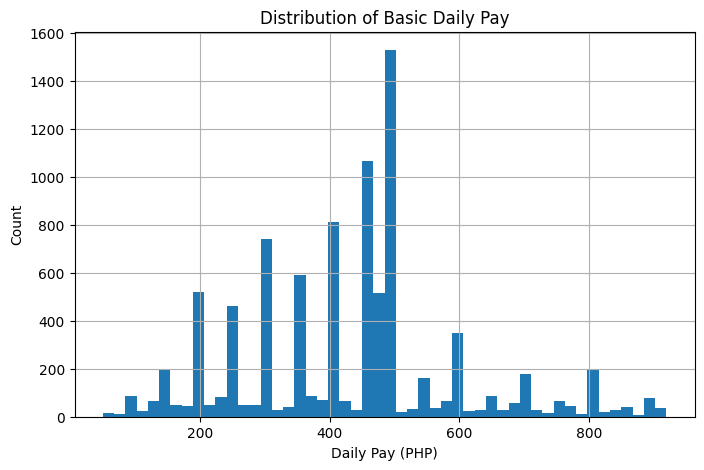

In [166]:
plt.figure(figsize=(8,5))
df_clean["LC25_PBASIC"].hist(bins=50)
plt.title("Distribution of Basic Daily Pay")
plt.xlabel("Daily Pay (PHP)")
plt.ylabel("Count")
plt.show()

## **Univariate Data Analysis**

#### NUMERICAL DATA (AGE, BASIC PAY)

In [167]:
# FOR NUMERICAL DATA

import seaborn as sns

# 1️⃣ Summary statistics for numeric
df_clean['LC05_AGE'] = pd.to_numeric(df_clean['LC05_AGE'], errors='coerce')     # convert from string to numeric
df_clean[['LC25_PBASIC', 'LC05_AGE']].describe()

/tmp/ipython-input-970091979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC05_AGE'] = pd.to_numeric(df_clean['LC05_AGE'], errors='coerce')     # convert from string to numeric


,LC25_PBASIC,LC05_AGE
count,8918.000000,8918.000000
mean,429.550572,37.888989
std,165.945143,12.760112
min,50.000000,15.000000
25%,300.000000,27.000000
50%,450.000000,36.000000
75%,500.000000,47.000000
max,919.000000,88.000000


#### BASIC DAILY PAY

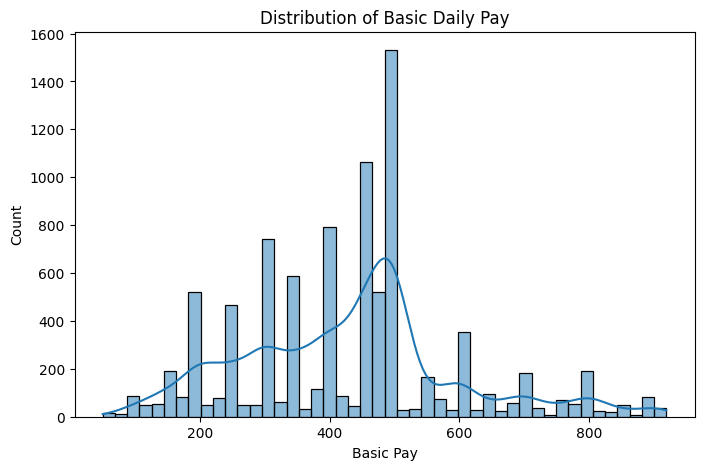

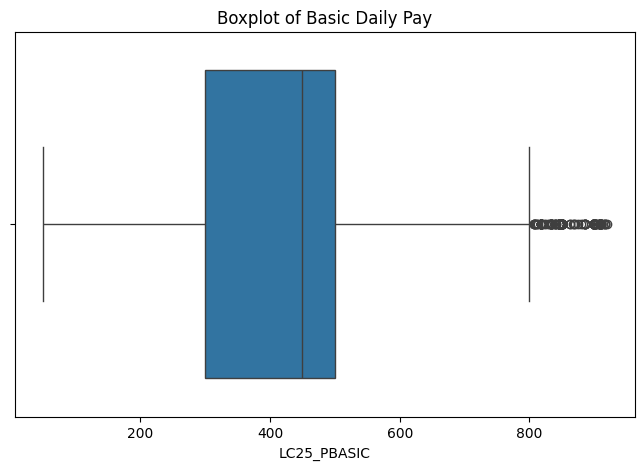

In [168]:
# FOR Target Variable: Basic Daily Pay

plt.figure(figsize=(8,5))
sns.histplot(df_clean['LC25_PBASIC'], kde=True)
plt.title("Distribution of Basic Daily Pay")
plt.xlabel("Basic Pay")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_clean['LC25_PBASIC'])
plt.title("Boxplot of Basic Daily Pay")
plt.show()



In [169]:
# Count the number of outliers

Q1 = df_clean["LC25_PBASIC"].quantile(0.25)
Q3 = df_clean["LC25_PBASIC"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df_clean[(df_clean["LC25_PBASIC"] < lower_bound) | (df_clean["LC25_PBASIC"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Lower bound: 0.0
Upper bound: 800.0
Number of outliers: 215


In [170]:
mean_value = df_clean['LC25_PBASIC'].mean()
median_value = df_clean['LC25_PBASIC'].median()

print("Mean:", mean_value)
print("Median:", median_value)

Mean: 429.55057187710247
Median: 450.0


The distribution of Basic Pay (LC25_PBASIC) is right-skewed, with outliers representing 2.41% of the clean dataset (215 out of 8918). This indicates that a small number of individuals earned higher pay as compared to the majority.

These extreme values were retained in the dataset but a log transformation was applied to the Basic Pay variable to reduce skewness and improve model performance. The transformed variable is the LC25_PBASIC_LOG and this was used as the dependent variable in subsequent analyses.

In [171]:
# Apply Log Transformation

df_clean['LC25_PBASIC_LOG'] = np.log1p(df_clean['LC25_PBASIC'])
df_clean.head()

/tmp/ipython-input-318587629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC25_PBASIC_LOG'] = np.log1p(df_clean['LC25_PBASIC'])


,LC07_HGC_LEVEL,LC25_PBASIC,LC04_SEX,LC05_AGE,LC09_GRADTECH,LC11A_ARRANGEMENT,LC17_NATEM,LC23_PCLASS,LC25_PBASIC_LOG
178963,2,400,1,54,2,1,2,1,5.993961
178964,6,300,2,50,2,1,1,1,5.707110
178965,2,300,1,24,2,1,2,1,5.707110
178969,2,400,1,61,2,1,2,1,5.993961
178971,6,350,2,44,2,1,1,1,5.860786


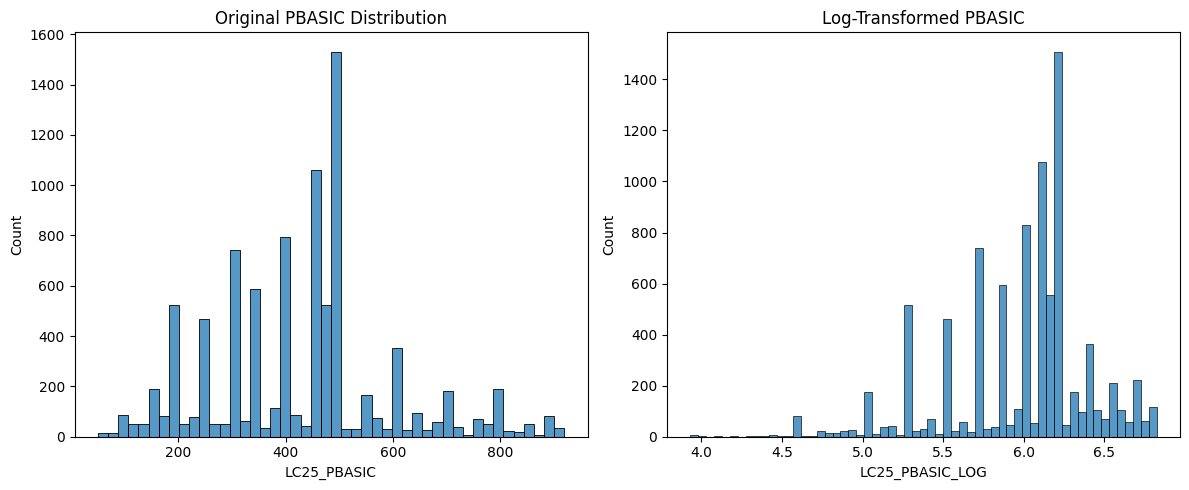

In [172]:
# Check distribution before and after

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(df_clean['LC25_PBASIC'], ax=axes[0])
axes[0].set_title("Original PBASIC Distribution")

sns.histplot(df_clean['LC25_PBASIC_LOG'], ax=axes[1])
axes[1].set_title("Log-Transformed PBASIC")

plt.tight_layout()
plt.show()

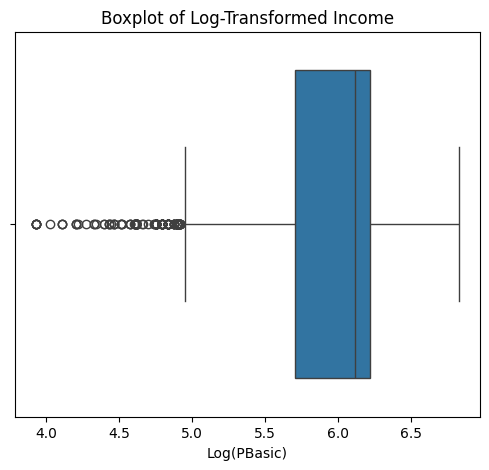

In [173]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_clean['LC25_PBASIC_LOG'])
plt.title('Boxplot of Log-Transformed Income')
plt.xlabel('Log(PBasic)')
plt.show()

#### AGE

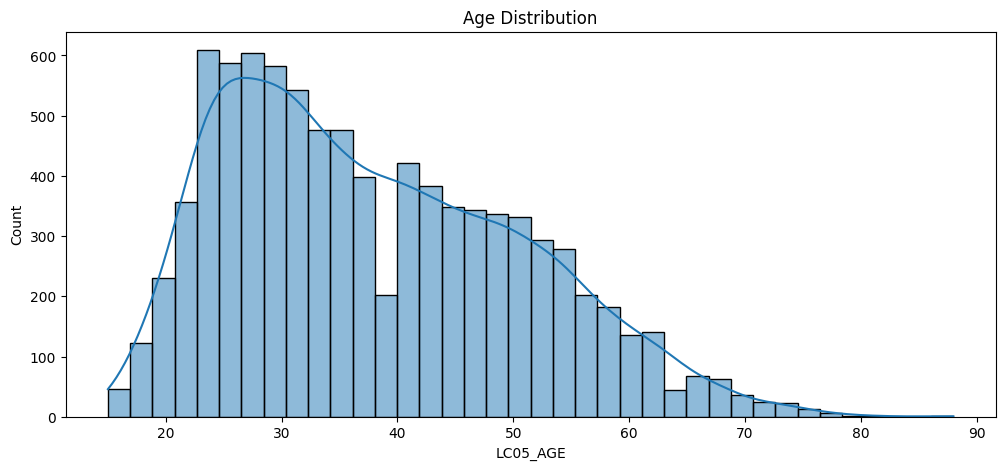

In [174]:
df_clean['LC05_AGE'].describe()

plt.figure(figsize=(12,5))
sns.histplot(df_clean['LC05_AGE'], kde=True)
plt.title("Age Distribution")
plt.show()


In [175]:
# GROUP AGE BY CATEGORIES

# Convert from string to numeric
df_clean['LC05_AGE'] = pd.to_numeric(df_clean['LC05_AGE'], errors='coerce')

# Define bins and labels
age_bins = [0, 15, 25, 35, 45, 55, 65, 90]  # adjust as needed
age_labels = ["0-14", "15-24", "25-34", "35-44", "45-55", "55-64", "65+"]

# Create new categorical column
df_clean['AGE_GROUP'] = pd.cut(df_clean['LC05_AGE'], bins=age_bins, labels=age_labels, right=True)

/tmp/ipython-input-2706980964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC05_AGE'] = pd.to_numeric(df_clean['LC05_AGE'], errors='coerce')
/tmp/ipython-input-2706980964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AGE_GROUP'] = pd.cut(df_clean['LC05_AGE'], bins=age_bins, labels=age_labels, right=True)


In [176]:
freq_table = df_clean['AGE_GROUP'].value_counts()
print(freq_table)

AGE_GROUP
25-34    2732
35-44    1992
15-24    1645
45-55    1582
55-64     749
65+       195
0-14       23
Name: count, dtype: int64


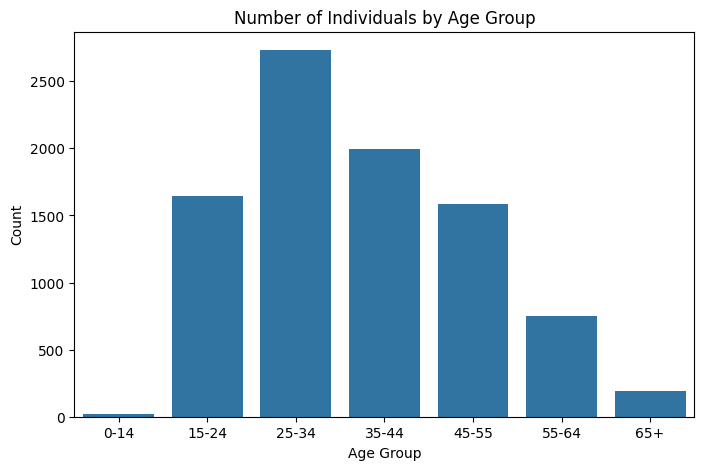

In [177]:
plt.figure(figsize=(8,5))
sns.countplot(x='AGE_GROUP', data=df_clean, order=age_labels)
plt.title("Number of Individuals by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

#### EDUCATION LEVEL



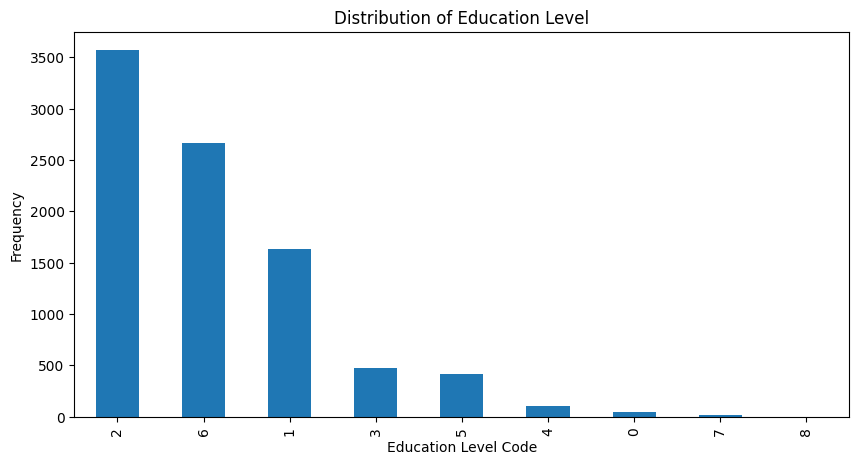

In [179]:
plt.figure(figsize=(10,5))
df_clean['LC07_HGC_LEVEL'].value_counts().plot(kind='bar')
plt.title("Distribution of Education Level")
plt.xlabel("Education Level Code")
plt.ylabel("Frequency")
plt.show()

In [181]:
edu_labels = {
    0: "Early Childhood Education",
    1: "Elementary",
    2: "Junior High School",
    3: "Senior High School",
    4: "Post-Secondary Non-Tertiary Education",
    5: "Short Cycle Tertiary Education",
    6: "Bachelor Level or equivalent",
    7: "Master Level or equivalent",
    8: "Doctoral Level or equivalent"
}

# Convert from string to integer and map labels
df_clean['LC07_HGC_LEVEL'] = df_clean['LC07_HGC_LEVEL'].astype(int)
df_clean['LC07_HGC_LABEL'] = df_clean['LC07_HGC_LEVEL'].map(edu_labels)
df_clean.head()

/tmp/ipython-input-266009002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC07_HGC_LEVEL'] = df_clean['LC07_HGC_LEVEL'].astype(int)
/tmp/ipython-input-266009002.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC07_HGC_LABEL'] = df_clean['LC07_HGC_LEVEL'].map(edu_labels)


,LC07_HGC_LEVEL,LC25_PBASIC,LC04_SEX,LC05_AGE,LC09_GRADTECH,LC11A_ARRANGEMENT,LC17_NATEM,LC23_PCLASS,LC25_PBASIC_LOG,AGE_GROUP,LC07_HGC_LABEL
178963,2,400,1,54,2,1,2,1,5.993961,45-55,Junior High School
178964,6,300,2,50,2,1,1,1,5.707110,45-55,Bachelor Level or equivalent
178965,2,300,1,24,2,1,2,1,5.707110,15-24,Junior High School
178969,2,400,1,61,2,1,2,1,5.993961,55-64,Junior High School
178971,6,350,2,44,2,1,1,1,5.860786,35-44,Bachelor Level or equivalent


In [182]:
edu_order = [
    "Early Childhood Education", "Elementary", "Junior High School",
    "Senior High School", "Post-Secondary Non-Tertiary Education",
    "Short Cycle Tertiary Education", "Bachelor Level or equivalent",
    "Master Level or equivalent", "Doctoral Level or equivalent"
]

freq_table = df_clean['LC07_HGC_LABEL'].value_counts().reindex(edu_order)
print(freq_table)

LC07_HGC_LABEL
Early Childhood Education                  44
Elementary                               1632
Junior High School                       3570
Senior High School                        473
Post-Secondary Non-Tertiary Education     103
Short Cycle Tertiary Education            414
Bachelor Level or equivalent             2664
Master Level or equivalent                 16
Doctoral Level or equivalent                2
Name: count, dtype: int64


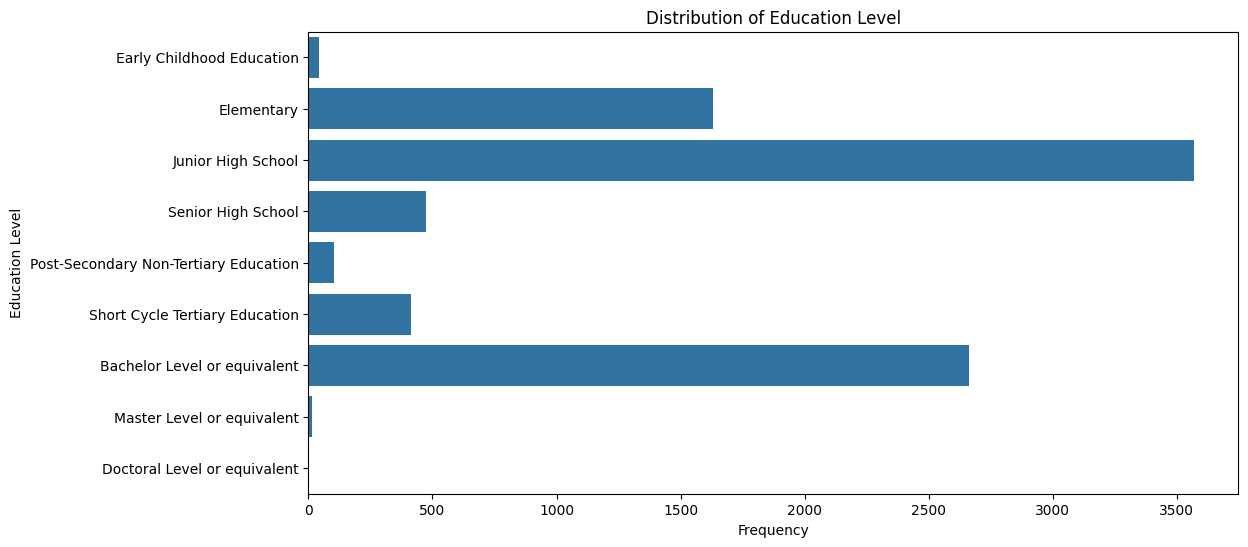

In [183]:
plt.figure(figsize=(12,6))
sns.countplot(
    y='LC07_HGC_LABEL',
    data=df_clean,
    order=[
        "Early Childhood Education", "Elementary", "Junior High School",
        "Senior High School", "Post-Secondary Non-Tertiary Education",
        "Short Cycle Tertiary Education", "Bachelor Level or equivalent",
        "Master Level or equivalent", "Doctoral Level or equivalent"
    ]
)
plt.title("Distribution of Education Level")
plt.ylabel("Education Level")
plt.xlabel("Frequency")
plt.show()

#### SEX (MALE OR FEMALE)

In [184]:
freq_table = df_clean['LC04_SEX'].value_counts()
print(freq_table)

LC04_SEX
1    5511
2    3407
Name: count, dtype: int64


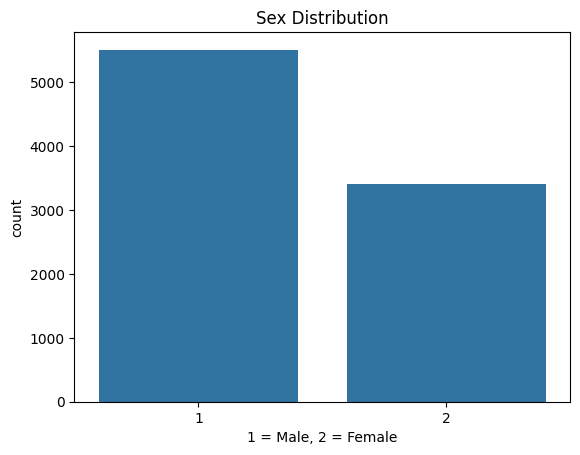

In [185]:
df_clean['LC04_SEX'].value_counts()

sns.countplot(x='LC04_SEX', data=df_clean)
plt.title("Sex Distribution")
plt.xlabel("1 = Male, 2 = Female")
plt.show()

#### GRADUATE OF TECHNICAL OR VOCATIONAL COURSE

In [186]:
freq_table = df_clean['LC09_GRADTECH'].value_counts()
print(freq_table)

LC09_GRADTECH
2    8487
1     431
Name: count, dtype: int64


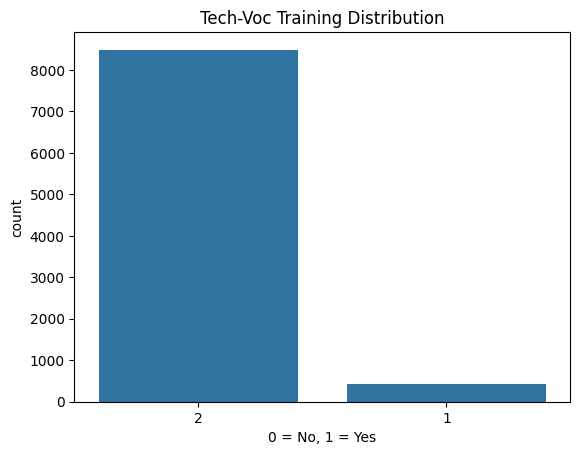

In [187]:
df_clean['LC09_GRADTECH'].value_counts()

sns.countplot(x='LC09_GRADTECH', data=df_clean)
plt.title("Tech-Voc Training Distribution")
plt.xlabel("0 = No, 1 = Yes")
plt.show()

#### WORK ARRANGEMENT

LC11A_ARRANGEMENT
1    8674
2     123
3      64
5      29
4      17
6      11
Name: count, dtype: int64


/tmp/ipython-input-1961652821.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC11A_ARRANGEMENT'] = df_clean['LC11A_ARRANGEMENT'].astype(int)
/tmp/ipython-input-1961652821.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC11A_ARRANGEMENT'] = df_clean['LC11A_ARRANGEMENT'].map(arrangement_labels)


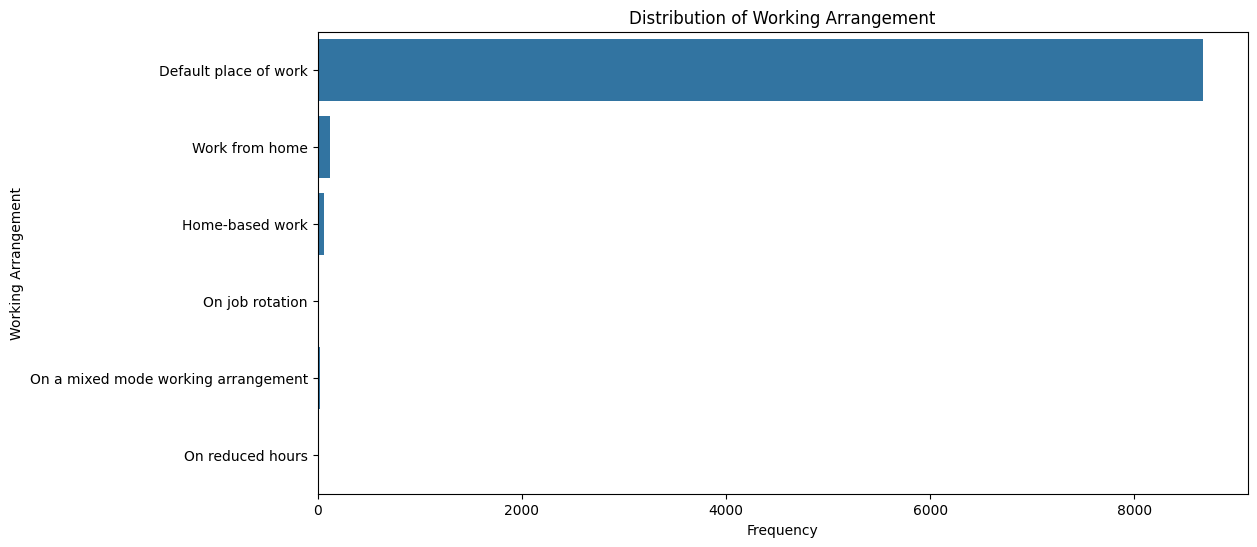

In [188]:
freq_table = df_clean['LC11A_ARRANGEMENT'].value_counts()
print(freq_table)

arrangement_labels = {
    1: "Default place of work",
    2: "Work from home",
    3: "Home-based work",
    4: "On job rotation",
    5: "On a mixed mode working arrangement",
    6: "On reduced hours"
}

# Convert from string to integer
df_clean['LC11A_ARRANGEMENT'] = df_clean['LC11A_ARRANGEMENT'].astype(int)

df_clean['LC11A_ARRANGEMENT'] = df_clean['LC11A_ARRANGEMENT'].map(arrangement_labels)

plt.figure(figsize=(12,6))
sns.countplot(
    y='LC11A_ARRANGEMENT',
    data=df_clean,
    order=[
        "Default place of work","Work from home","Home-based work",
        "On job rotation","On a mixed mode working arrangement",
        "On reduced hours"
    ]
)
plt.title("Distribution of Working Arrangement")
plt.ylabel("Working Arrangement")
plt.xlabel("Frequency")
plt.show()

#### NATURE OF EMPLOYMENT

In [189]:
freq_table = df_clean['LC17_NATEM'].value_counts()
print(freq_table)

LC17_NATEM
1    5495
2    3104
3     319
Name: count, dtype: int64


/tmp/ipython-input-1986449914.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC17_NATEM'] = df_clean['LC17_NATEM'].astype(int)
/tmp/ipython-input-1986449914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC17_NATEM'] = df_clean['LC17_NATEM'].map(natem_labels)


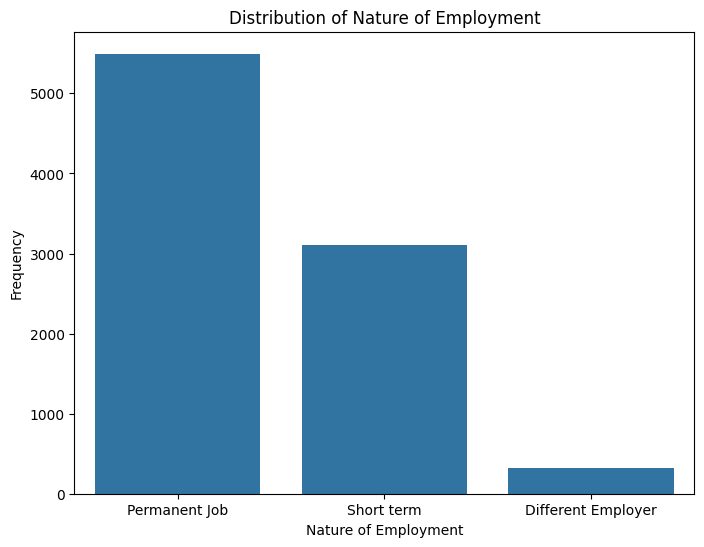

In [190]:
natem_labels = {
    1: "Permanent Job",
    2: "Short term",
    3: "Different Employer"
}

# Convert from string to integer
df_clean['LC17_NATEM'] = df_clean['LC17_NATEM'].astype(int)
df_clean['LC17_NATEM'] = df_clean['LC17_NATEM'].map(natem_labels)

plt.figure(figsize=(8,6))
sns.countplot(
    x='LC17_NATEM',
    data=df_clean,
    order=["Permanent Job", "Short term", "Different Employer"]
)
plt.title("Distribution of Nature of Employment")
plt.xlabel("Nature of Employment")
plt.ylabel("Frequency")
plt.show()

#### CLASS OF WORKER

In [191]:
freq_table = df_clean['LC23_PCLASS'].value_counts()
print(freq_table)

LC23_PCLASS
1    7006
0    1011
2     840
5      61
Name: count, dtype: int64


/tmp/ipython-input-630815804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC23_PCLASS'] = df_clean['LC23_PCLASS'].astype(int)
/tmp/ipython-input-630815804.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC23_PCLASS'] = df_clean['LC23_PCLASS'].map(pclass_labels)


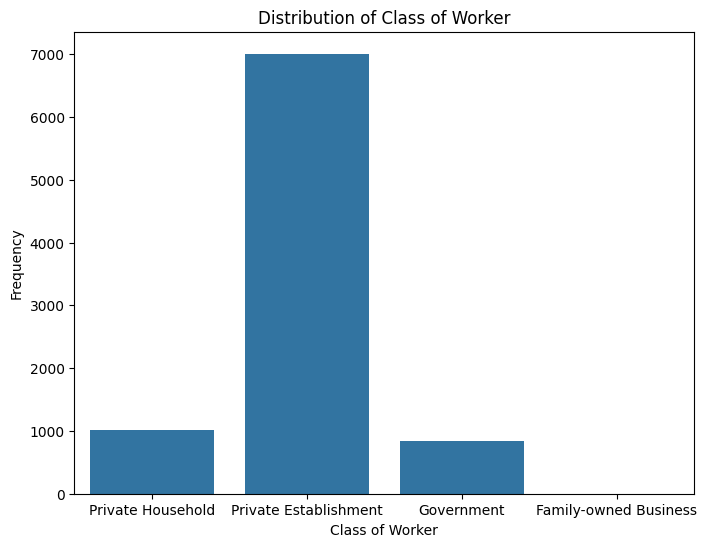

In [192]:
pclass_labels = {
    0: "Private Household",
    1: "Private Establishment",
    2: "Government",
    3: "Family-owned Business"
}

# Convert from string to integer
df_clean['LC23_PCLASS'] = df_clean['LC23_PCLASS'].astype(int)
df_clean['LC23_PCLASS'] = df_clean['LC23_PCLASS'].map(pclass_labels)

plt.figure(figsize=(8,6))
sns.countplot(
    x='LC23_PCLASS',
    data=df_clean,
    order=["Private Household", "Private Establishment", "Government", "Family-owned Business"]
)
plt.title("Distribution of Class of Worker")
plt.xlabel("Class of Worker")
plt.ylabel("Frequency")
plt.show()

## **Bivariate Data Analysis**

#### BASIC DAILY PAY and EDUCATION LEVEL

In [193]:
hgc_order = [
    "Early Childhood Education",
    "Elementary",
    "Junior High School",
    "Senior High School",
    "Post-Secondary Non-Tertiary Education",
    "Short Cycle Tertiary Education",
    "Bachelor Level or equivalent",
    "Master Level or equivalent",
    "Doctoral Level or equivalent"
]

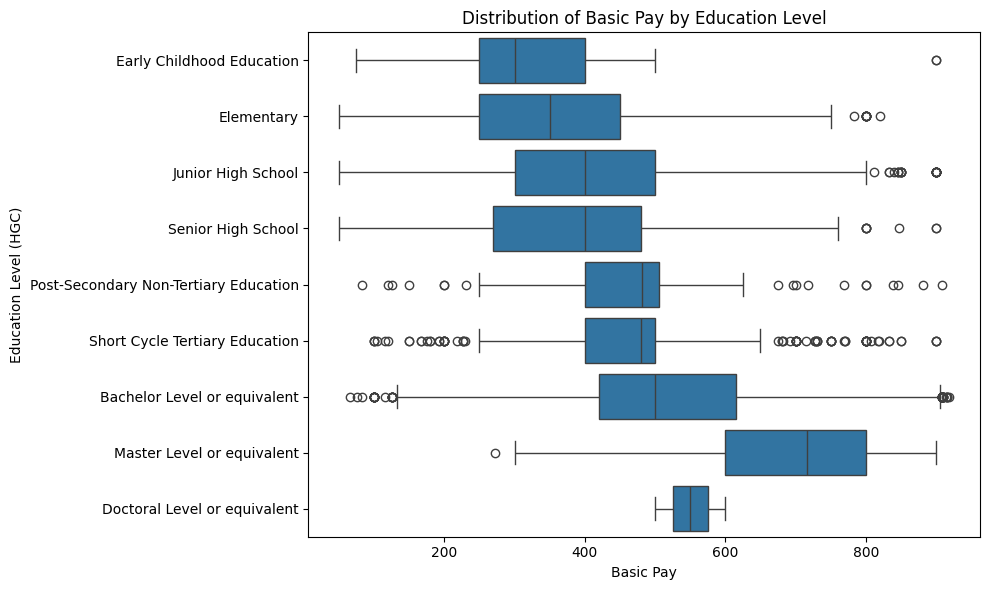

In [202]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LC07_HGC_LABEL', x='LC25_PBASIC', data=df_clean, order=hgc_order)
plt.title('Distribution of Basic Pay by Education Level')
plt.xlabel('Basic Pay')
plt.ylabel('Education Level (HGC)')
plt.tight_layout()
plt.show()

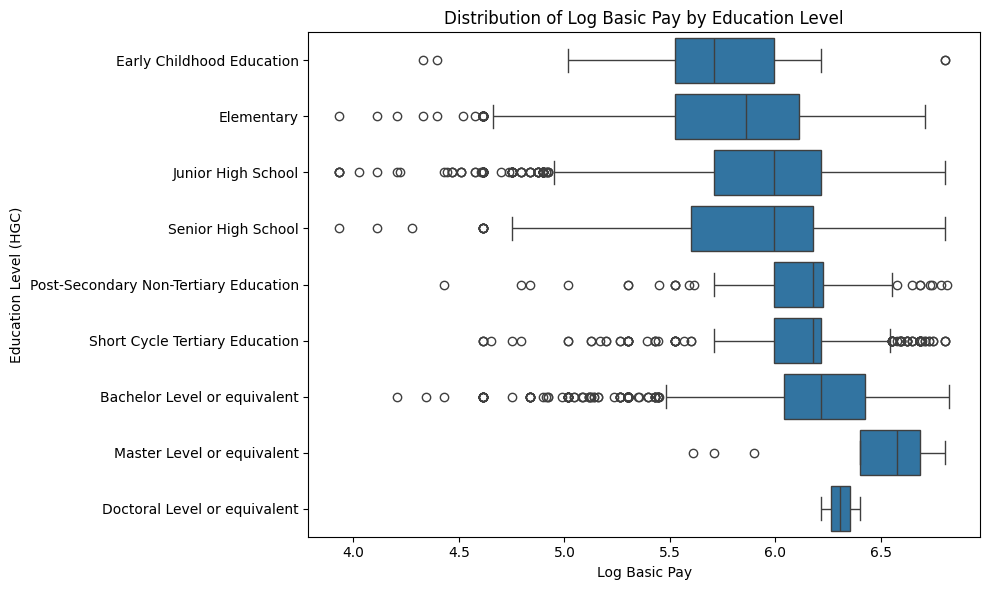

In [201]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LC07_HGC_LABEL', x='LC25_PBASIC_LOG', data=df_clean, order=hgc_order)
plt.title('Distribution of Log Basic Pay by Education Level')
plt.xlabel('Log Basic Pay')
plt.ylabel('Education Level (HGC)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2296548672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='LC07_HGC_LABEL', x='LC25_PBASIC', data=df_clean, order=hgc_order, palette='pastel')


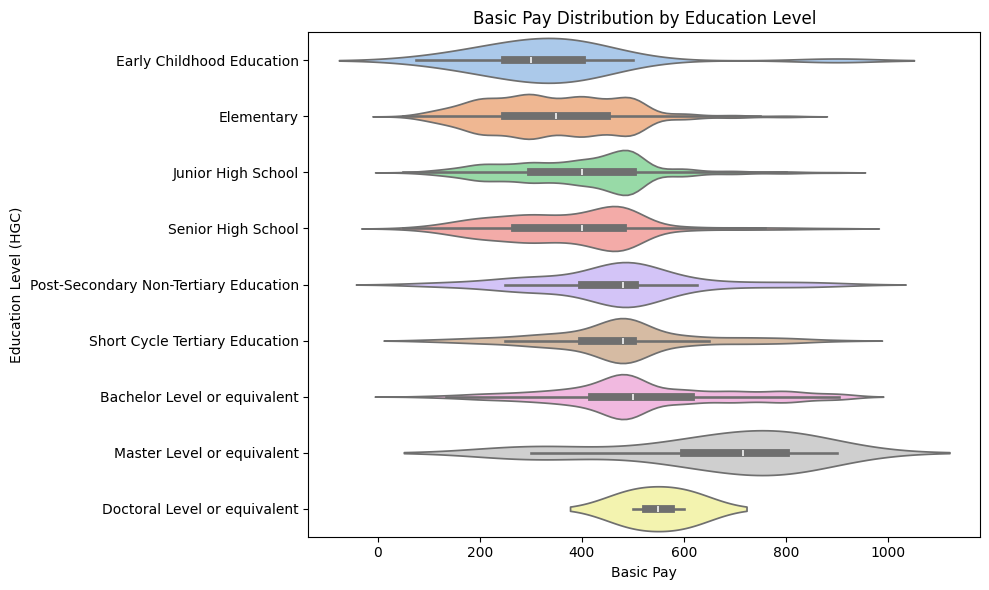

In [199]:
plt.figure(figsize=(10,6))
sns.violinplot(y='LC07_HGC_LABEL', x='LC25_PBASIC', data=df_clean, order=hgc_order, palette='pastel')
plt.title('Basic Pay Distribution by Education Level')
plt.xlabel('Basic Pay')
plt.ylabel('Education Level (HGC)')
plt.tight_layout()
plt.show()

In [203]:
# Group Summary

df_clean['LC07_HGC_LABEL'] = pd.Categorical(df_clean['LC07_HGC_LABEL'], categories=hgc_order, ordered=True)

df_clean.groupby('LC07_HGC_LABEL')['LC25_PBASIC'].agg(['mean','std','count'])

/tmp/ipython-input-3625573680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LC07_HGC_LABEL'] = pd.Categorical(df_clean['LC07_HGC_LABEL'], categories=hgc_order, ordered=True)
/tmp/ipython-input-3625573680.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('LC07_HGC_LABEL')['LC25_PBASIC'].agg(['mean','std','count'])


,mean,std,count
LC07_HGC_LABEL,,,
Early Childhood Education,340.795455,161.504349,44
Elementary,346.231005,133.390250,1632
Junior High School,400.617647,142.747930,3570
Senior High School,377.124736,141.625159,473
Post-Secondary Non-Tertiary Education,469.834951,159.359447,103
Short Cycle Tertiary Education,474.722222,148.121319,414
Bachelor Level or equivalent,520.095345,174.748215,2664
Master Level or equivalent,658.812500,192.611948,16
Doctoral Level or equivalent,550.000000,70.710678,2


In [204]:
# Assume PBASIC is roughly normal per group

from scipy.stats import f_oneway

groups = [df_clean[df_clean['LC07_HGC_LABEL']==lvl]['LC25_PBASIC'] for lvl in df_clean['LC07_HGC_LABEL'].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA F =", f_stat, "p-value =", p_val)

# Assume PBASIC is not normally distributed per group

from scipy.stats import kruskal
h_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis H =", h_stat, "p-value =", p_val)

ANOVA F = 214.68419278747962 p-value = 0.0
Kruskal-Wallis H = 1328.8919515488972 p-value = 1.3365010438377848e-281


#### BASIC DAILY PAY AND SEX

/tmp/ipython-input-1894835849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LC04_SEX', y='LC25_PBASIC', data=df_clean, palette='Set2')


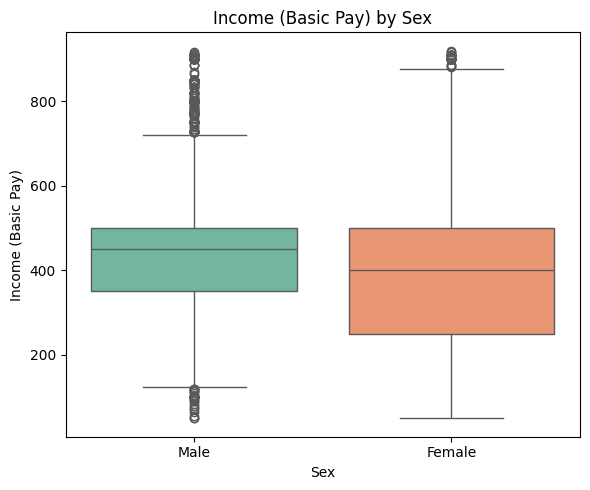

In [210]:
plt.figure(figsize=(6,5))

sns.boxplot(x='LC04_SEX', y='LC25_PBASIC', data=df_clean, palette='Set2')
plt.title('Income (Basic Pay) by Sex')
plt.ylabel('Income (Basic Pay)')
plt.xlabel('Sex')

plt.xticks([0, 1], ['Male', 'Female'])
plt.tight_layout()
plt.show()

# **CATEGORICAL ENCODING**

In [211]:
# Handle categorical encoding (Label Encoding and One-Hot Encoding for Machine Learning (ML))

from sklearn.preprocessing import LabelEncoder

# Copy your dataframe to avoid editing original
df_clean_final = df_clean.copy()

# Label Encoding for ORDINAL columns
label_cols = [
    "LC07_HGC_LEVEL",
    "LC09_GRADTECH"
]

le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df_clean_final[col] = le.fit_transform(df_clean_final[col].astype(str))
    le_dict[col] = le  # store encoders for inverse transform later if needed

# One-hot Encoding for NOMINAL columns
onehot_cols = [
    "LC04_SEX",
    "LC11A_ARRANGEMENT",
    "LC17_NATEM",
    "LC23_PCLASS"
]

df_clean_final = pd.get_dummies(df_clean_final, columns=onehot_cols, drop_first=True)

# Display shape after encoding
print("Encoded dataset shape:", df_clean_final.shape)

# Confirm no missing target values remain
df_clean_final = df_clean_final.dropna(subset=["LC25_PBASIC"])

Encoded dataset shape: (8918, 17)


In [212]:
# No NaN values
print(df_clean_final.isna().sum())

LC07_HGC_LEVEL                                           0
LC25_PBASIC                                              0
LC05_AGE                                                 0
LC09_GRADTECH                                            0
LC25_PBASIC_LOG                                          0
AGE_GROUP                                                0
LC07_HGC_LABEL                                           0
LC04_SEX_2                                               0
LC11A_ARRANGEMENT_Home-based work                        0
LC11A_ARRANGEMENT_On a mixed mode working arrangement    0
LC11A_ARRANGEMENT_On job rotation                        0
LC11A_ARRANGEMENT_On reduced hours                       0
LC11A_ARRANGEMENT_Work from home                         0
LC17_NATEM_Permanent Job                                 0
LC17_NATEM_Short term                                    0
LC23_PCLASS_Private Establishment                        0
LC23_PCLASS_Private Household                           

# **BUILD MODEL**

In [213]:
df_clean.columns

Index(['LC07_HGC_LEVEL', 'LC25_PBASIC', 'LC04_SEX', 'LC05_AGE',
       'LC09_GRADTECH', 'LC11A_ARRANGEMENT', 'LC17_NATEM', 'LC23_PCLASS',
       'LC25_PBASIC_LOG', 'AGE_GROUP', 'LC07_HGC_LABEL'],
      dtype='object')

#### Try Linear Regression

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define input (X) and output (y)
X = df_clean_final.drop(columns=['LC25_PBASIC_LOG', 'LC25_PBASIC', 'AGE_GROUP', 'LC07_HGC_LABEL'])
y = df_clean_final['LC25_PBASIC_LOG']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict
y_pred = model_lr.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📌 Baseline Linear Regression Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

📌 Baseline Linear Regression Results
MAE: 0.280800672006743
RMSE: 0.3717974428164895
R² Score: 0.2385430460407807


##### Feature Importance

In [215]:
# Check Feature Importance

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_lr.coef_
}).sort_values(by='Coefficient', ascending=False)

importance

,Feature,Coefficient
8,LC11A_ARRANGEMENT_Work from home,0.343305
0,LC07_HGC_LEVEL,0.069610
1,LC05_AGE,0.000421
6,LC11A_ARRANGEMENT_On job rotation,-0.023724
9,LC17_NATEM_Permanent Job,-0.031867
11,LC23_PCLASS_Private Establishment,-0.043175
2,LC09_GRADTECH,-0.063744
5,LC11A_ARRANGEMENT_On a mixed mode working arra...,-0.080784
4,LC11A_ARRANGEMENT_Home-based work,-0.115183
3,LC04_SEX_2,-0.125444


#### Try Random Forest

In [218]:
# Try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# Define input (X) and output (y)
X = df_clean_final.drop(columns=['LC25_PBASIC_LOG', 'LC25_PBASIC', 'AGE_GROUP', 'LC07_HGC_LABEL'])
y = df_clean_final['LC25_PBASIC_LOG']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("📌 Baseline Random Forest Regressor Results")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

📌 Baseline Random Forest Regressor Results
MAE: 0.29127774341881923
RMSE: 0.3899480730024157
R² Score: 0.1623817764641129


#### Try Gradient Boost

In [219]:
# Try Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

# Define input (X) and output (y)
X = df_clean_final.drop(columns=['LC25_PBASIC_LOG', 'LC25_PBASIC', 'AGE_GROUP', 'LC07_HGC_LABEL'])
y = df_clean_final['LC25_PBASIC_LOG']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R²:", r2_score(y_test, y_pred_gb))

MAE: 0.26977310742852556
RMSE: 0.3592230416550044
R²: 0.28917788332798


##### Feature Importance

In [220]:
import pandas as pd
feat_imp = pd.Series(
    model_gb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feat_imp.head(20)

,0
LC23_PCLASS_Private Household,0.379076
LC07_HGC_LEVEL,0.315846
LC04_SEX_2,0.104237
LC05_AGE,0.089817
LC17_NATEM_Permanent Job,0.035593
LC17_NATEM_Short term,0.024072
LC11A_ARRANGEMENT_Work from home,0.019248
LC23_PCLASS_Private Establishment,0.015338
LC11A_ARRANGEMENT_On reduced hours,0.006390
LC09_GRADTECH,0.004830


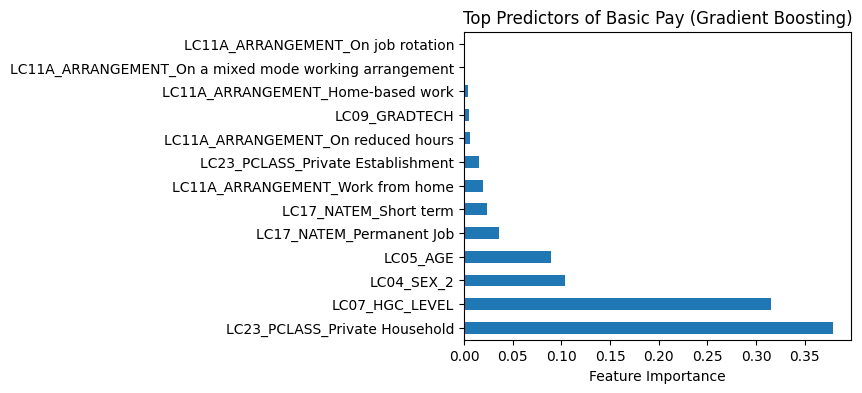

In [221]:
feat_imp.head(15).plot(kind='barh', figsize=(5,4))
plt.title("Top Predictors of Basic Pay (Gradient Boosting)")
plt.xlabel("Feature Importance")
plt.show()

##### Residual Analysis

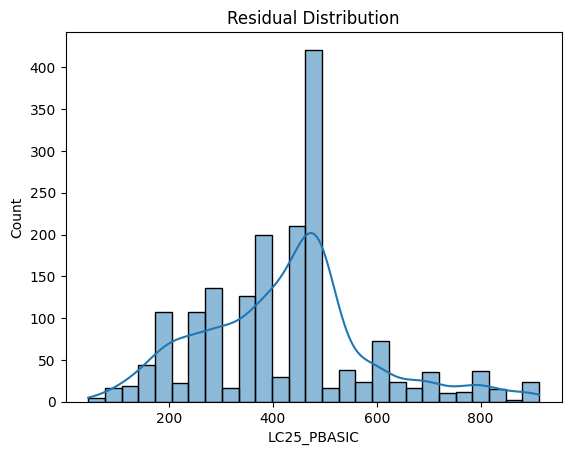

In [225]:
residuals = y_test - y_pred_gb
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

#### Try Robust Regression (Huber Regression)

In [250]:
# Try Robust Regression

from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define input (X) and output (y)
X = df_clean_final.drop(columns=['LC25_PBASIC_LOG', 'LC25_PBASIC', 'AGE_GROUP', 'LC07_HGC_LABEL'])
y = df_clean_final['LC25_PBASIC']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Robust Regression
model_huber = HuberRegressor()
model_huber.fit(X_train, y_train)

# Predict
y_pred_huber = model_huber.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_huber)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_huber))
r2 = r2_score(y_test, y_pred_huber)

print("Huber Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Huber Regression Results:
MAE: 107.67749417584378
RMSE: 142.43044491243782
R²: 0.2236663945893268


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Education level, working arrangement, nature of employment, sex, and age were consistent factors affecting basic daily pay. The **Gradient Boosting model** was able to explain 28.9% of the differences in income, indicating that
demographic and employment characteristics recorded by PSA moderately predict income. However, other external labor market factors still pay a big role in determining basic daily pay.